### 逻辑回归-线性可分
案例：根据学生的两门成绩，预测是否会被录取

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
path='ex2data1.txt'
data=pd.read_csv(path,names=['Exam 1','Exam 2','Accepted'])
data.head()

,Exam 1,Exam 2,Accepted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


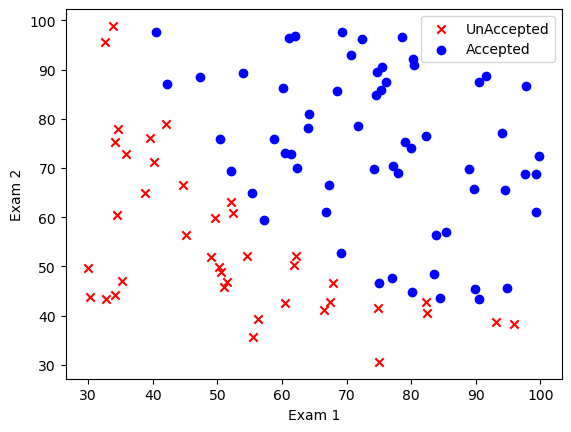

In [5]:
fig,ax=plt.subplots()
ax.scatter(data[data['Accepted']==0]['Exam 1'],data[data['Accepted']==0]['Exam 2'],c='r',marker='x',label='UnAccepted')
ax.scatter(data[data['Accepted']==1]['Exam 1'],data[data['Accepted']==1]['Exam 2'],c='b',marker='o',label='Accepted')
ax.legend()
ax.set(xlabel='Exam 1',ylabel='Exam 2')
plt.show()

In [6]:
def get_Xy(data):
    data.insert(0,'ones',1)
    X_=data.iloc[:,0:-1]
    X=X_.values
    y_=data.iloc[:,-1]
    y=y_.values.reshape(len(y_),1)

    return X,y

In [9]:
X,y=get_Xy(data)

ValueError: cannot insert ones, already exists

#### 激活函数
$$
g(z)=\frac{1}{1+e^{-z}}
$$

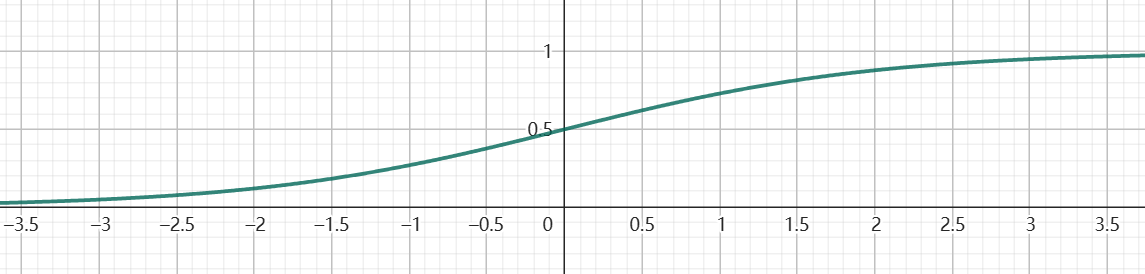

In [10]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

#### 代价函数
$$
min\ J(θ)=-\frac{1}{m}[\sum_{i=1}^{m} y^{(i)}logh_θ(x^{(i)})+(1-y^{(i)})log(1-h_θ(x^{(i)}))]
$$

$$
\hat{y}=g(Xθ)
$$

$$
J(θ)=-\frac{1}{m}[y*log(\hat{y})+(1-y)*log(1-\hat{y})]
$$

In [2]:
def costFunction(X,y,theta):
    A=sigmoid(X@theta)

    first=y*np.log(A)
    second=(1-y)*np.log(1-A)
    return -np.sum(first+second)/len(X)

In [12]:
theta=np.zeros((3,1))

In [13]:
cost_init=costFunction(X,y,theta)
print(cost_init)

0.6931471805599453


#### 梯度下降
$$
\frac{\partial{J(θ)}}{\partial{θ_j}} = \frac{1}{m} \sum_{i=1}^{m}(h_θ(x^{(i)})-y^{(i)})x_j^{(i)}
$$

$$
θ=θ-\frac{\alpha}{m}*X^T(g(Xθ)-y)
$$

In [19]:
def gradientDescent(X,y,theta,iters,alpha,isPrint):
    m=len(X)
    costs=[]

    for i in range(iters):
        A=sigmoid(X@theta)
        theta=theta-(alpha/m)*X.T@(A-y)
        cost=costFunction(X,y,theta)
        costs.append(cost)
        if isPrint and i%1000==0:
            print(cost)
    return costs,theta

In [25]:
alpha=0.004
iters=200000

In [22]:
costs,theta_final=gradientDescent(X,y,theta,iters,alpha,False)

In [24]:
theta_final

array([[-24.21422347],
       [  0.19865709],
       [  0.19380726]])

In [23]:
def predict(X,theta):
    prob=sigmoid(X@theta)
    return [1 if x>=0.5 else 0 for x in prob]

In [26]:
y_=np.array(predict(X,theta_final))
y_pre=y_.reshape(len(y_),1)

acc=np.mean(y_pre==y)
print(acc)

0.89


#### 决策函数
找g(z)=0.5的点，即z=0，
$$
z=X@theta=0
$$
$$
θ_0+θ_1x_1+θ_2x_2=0
$$
$$
x_2=-\frac{θ_0}{θ_2}-\frac{θ_1}{θ_2}x_1\\
$$

In [28]:
coef1=-theta_final[0,0]/theta_final[2,0]
coef2=-theta_final[1,0]/theta_final[2,0]

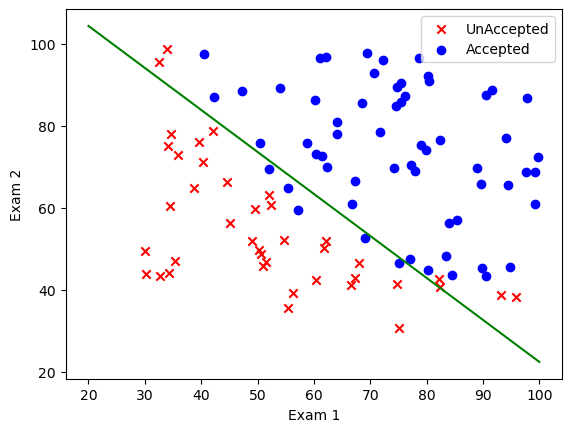

In [29]:
x=np.linspace(20,100,100)
f=coef1+coef2*x

fig,ax=plt.subplots()
ax.scatter(data[data['Accepted']==0]['Exam 1'],data[data['Accepted']==0]['Exam 2'],c='r',marker='x',label='UnAccepted')
ax.scatter(data[data['Accepted']==1]['Exam 1'],data[data['Accepted']==1]['Exam 2'],c='b',marker='o',label='Accepted')
ax.legend()
ax.set(xlabel='Exam 1',ylabel='Exam 2')
ax.plot(x,f,c='g')
plt.show()